In [447]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from tqdm import trange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [448]:
dataset = pd.read_csv("./datasets/USA_Housing.csv")
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset.shape)
dataset.head()

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,72646.505992,4.961008,7.842306,4.26,35628.825386,1.285019e+06,"459 Hall Street Suite 619\nPamelaberg, SD 16934"
1,62342.847184,6.506083,4.666260,2.47,38010.372739,8.239419e+05,75010 Aimee Summit Suite 517\nWest Angelcheste...
2,72770.166856,7.680416,6.387694,4.05,21357.036529,1.293462e+06,"58915 Jason Green\nPort Kimberly, MO 60047-2438"
3,71560.019889,5.685707,5.776343,4.12,40311.276258,1.049672e+06,"6633 Keller Key Suite 289\nNorth Joel, AR 9374..."
4,65694.051265,6.436741,6.704929,3.14,43406.712030,1.359763e+06,"PSC 2681, Box 5759\nAPO AA 82431-2879"


In [449]:
dataset = dataset.drop(columns=['Address'])
print(dataset.shape)
dataset.head()

(5000, 6)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,72646.505992,4.961008,7.842306,4.26,35628.825386,1.285019e+06
1,62342.847184,6.506083,4.666260,2.47,38010.372739,8.239419e+05
2,72770.166856,7.680416,6.387694,4.05,21357.036529,1.293462e+06
3,71560.019889,5.685707,5.776343,4.12,40311.276258,1.049672e+06
4,65694.051265,6.436741,6.704929,3.14,43406.712030,1.359763e+06


In [450]:
y = dataset['Price']
y.head()
y = y.to_numpy().astype(np.float32)
dataset = dataset.drop(columns=['Price'])
print(dataset.shape)
dataset.head()

(5000, 5)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,72646.505992,4.961008,7.842306,4.26,35628.825386
1,62342.847184,6.506083,4.666260,2.47,38010.372739
2,72770.166856,7.680416,6.387694,4.05,21357.036529
3,71560.019889,5.685707,5.776343,4.12,40311.276258
4,65694.051265,6.436741,6.704929,3.14,43406.712030


In [451]:
X = dataset.to_numpy().astype(np.float32)

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [453]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4000, 5]),
 torch.Size([1000, 5]),
 torch.Size([4000]),
 torch.Size([1000]))

In [454]:
y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [455]:
input_size, output_size = 5, 1
learning_rate = 0.01

class DavNet(nn.Module):
    
    def __init__(self, input_size, ouput_size):
        super(DavNet, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

losses: 10179610624.00000:  44%|███████████████████████▌                             | 2958/6666 [00:02<00:02, 1260.38it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

losses: 10179610624.00000: 100%|█████████████████████████████████████████████████████| 6666/6666 [00:05<00:00, 1268.41it/s]


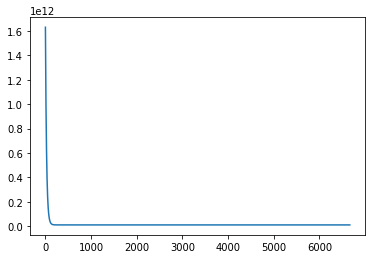

In [456]:
losses = []
epochs = 6666
for epoch in (t := trange(epochs)):
    
    y_predictions = model(X_train)
    
    loss = criterion(y_predictions, y_train)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    losses.append(loss.item())
    
    t.set_description("losses: %.5f" % (loss.item()))
    
plt.plot(losses)

In [457]:
predictions = model(X_test).detach().numpy()
corrects = y_test.detach().numpy()

error = predictions - np.abs(predictions-corrects)
error.mean(), error.min(), error.max()

(1159174.6, 31140.516, 2196382.5)